In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')


In [2]:
df1 = pd.read_csv("sales_orders.csv")
df2 = pd.read_csv("sales_orders_items.csv")
df3 = pd.read_csv("login_logs.csv")

In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13630 entries, 0 to 13629
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            13630 non-null  int64 
 1   fk_buyer_id         13630 non-null  int64 
 2   fk_depot_id         13630 non-null  int64 
 3   sales_order_status  13630 non-null  object
 4   creation_time       13630 non-null  object
dtypes: int64(3), object(2)
memory usage: 532.5+ KB


In [4]:
df1.head(2)

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation_time
0,119874,82228,5,Rejected,2021-07-01 00:35:28.0
1,119877,40476,1,Rejected,2021-07-01 02:02:43.0


In [5]:
df1["creation date"] = pd.to_datetime(df1["creation_time"])

In [6]:
df1["creation date"] = df1["creation date"].dt.date

In [7]:
df1["creation date"] = pd.to_datetime(df1["creation date"])

In [8]:
df1["year"] = df1["creation date"].dt.year

In [9]:
df1["creation date"] = pd.to_datetime(df1["creation date"])

In [10]:
df1["creation time"] = pd.to_datetime(df1["creation_time"])

In [11]:
df1.drop(columns = ["creation_time"],inplace=True)

In [12]:
df1.head(2)

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation date,year,creation time
0,119874,82228,5,Rejected,2021-07-01,2021,2021-07-01 00:35:28
1,119877,40476,1,Rejected,2021-07-01,2021,2021-07-01 02:02:43


In [13]:
df3.head(2)

,login_log_id,user_id,login_time
0,1385328,99160,2021-07-01 00:00:33.0
1,1385329,83272,2021-07-01 00:00:38.0


In [14]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 666357 entries, 0 to 666356
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   login_log_id  666357 non-null  int64 
 1   user_id       666357 non-null  int64 
 2   login_time    666357 non-null  object
dtypes: int64(2), object(1)
memory usage: 15.3+ MB


In [15]:
df3["login date"] = pd.to_datetime(df3["login_time"])

In [16]:
df3["login date"] = df3["login date"].dt.date

In [17]:
df3["login date"] = pd.to_datetime(df3["login date"])

In [18]:
df3["year"] = df3["login date"].dt.year

In [19]:
df3["login time"] = pd.to_datetime(df3["login_time"])

In [20]:
df3["login time"] = df3["login time"].dt.time

In [21]:
df3.drop(columns = ["login_time"],inplace=True)

In [22]:
df3.head(2)

,login_log_id,user_id,login date,year,login time
0,1385328,99160,2021-07-01,2021,00:00:33
1,1385329,83272,2021-07-01,2021,00:00:38


In [23]:
df1.head(2)

,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation date,year,creation time
0,119874,82228,5,Rejected,2021-07-01,2021,2021-07-01 00:35:28
1,119877,40476,1,Rejected,2021-07-01,2021,2021-07-01 02:02:43


In [24]:
merge_data=pd.merge(df2,df1,how="left",left_on="fk_order_id",right_on="order_id")

In [25]:
merge_data.head()

,order_item_id,fk_product_id,fk_order_id,ordered_quantity,order_quantity_accepted,rate,order_id,fk_buyer_id,fk_depot_id,sales_order_status,creation date,year,creation time
0,62609,7818,119874,1,0,4993.00,119874,82228,5,Rejected,2021-07-01,2021,2021-07-01 00:35:28
1,62610,7607,119877,1,0,6203.40,119877,40476,1,Rejected,2021-07-01,2021,2021-07-01 02:02:43
2,62611,9916,119880,2,2,2904.41,119880,41728,8,Shipped,2021-07-01,2021,2021-07-01 02:42:12
3,62612,11118,119880,2,2,2205.00,119880,41728,8,Shipped,2021-07-01,2021,2021-07-01 02:42:12
4,62613,12702,119880,2,2,2200.85,119880,41728,8,Shipped,2021-07-01,2021,2021-07-01 02:42:12


In [26]:
df = merge_data.drop(["fk_order_id","fk_depot_id"],axis=1)

In [27]:
total_order_2021 = len(df[(df["year"]==2021)])

In [28]:
total_order_2022 = len(df[(df["year"]==2022)])

In [29]:
total_order_shiped_2021= len(df[(df['sales_order_status']== 'Shipped') & (df['year']== 2021)])

In [30]:
total_order_shiped_2022 = len(df[(df['sales_order_status']== 'Shipped') & (df['year']== 2022)])

In [31]:
total_order_percentage_2021 = (total_order_shiped_2021/total_order_2021)*100

In [32]:
total_order_percentage_2022 = (total_order_shiped_2022/total_order_2022)*100

In [33]:
total_order_percentage_2021

42.3163036841034

In [34]:
total_order_percentage_2022

48.29300318889514

In [35]:
splited_order_status = df.groupby(["year","sales_order_status"]).agg({'year':['count']})

In [36]:
splited_order_status

year
                        count
year sales_order_status      
2021 Pending               45
     Rejected            5623
     Shipped             4158
2022 Pending               41
     Rejected            5471
     Review                 1
     Shipped             5149

In [37]:
df3.head()

,login_log_id,user_id,login date,year,login time
0,1385328,99160,2021-07-01,2021,00:00:33
1,1385329,83272,2021-07-01,2021,00:00:38
2,1385330,83272,2021-07-01,2021,00:00:42
3,1385331,96640,2021-07-01,2021,00:02:08
4,1385332,99160,2021-07-01,2021,00:02:38


In [38]:
user_base_2021 =len(df3[(df3["year"]==2021)])

In [39]:
user_base_2022=len(df3[(df3["year"]==2022)])

In [40]:
growth_user_base =user_base_2022 -user_base_2021 

In [41]:
growth_user_base

123877

In [42]:
user_growth_percentage = (growth_user_base/user_base_2022)*100

In [43]:
user_growth_percentage

31.351979287147856

In [44]:
rejection_rate_2021 = ((len(df[(df['sales_order_status']== 'Rejected') & (df['year']== 2021)]))/total_order_2021)*100

In [45]:
rejection_rate_2021

57.225727661306735

In [46]:
rejection_rate_2022 = ((len(df[(df['sales_order_status']== 'Rejected') & (df['year']== 2022)]))/total_order_2022)*100

In [47]:
rejection_rate_2022

51.31307447008066

In [48]:
pending_rate_2022 =((len(df[(df['sales_order_status']== 'Pending') & (df['year']== 2022)]))/total_order_2022)*100

In [49]:
pending_rate_2022

0.3845432376664791

In [50]:
pending_rate_2021 = ((len(df[(df['sales_order_status']== 'Pending') & (df['year']== 2022)]))/total_order_2021)*100

In [51]:
pending_rate_2021

0.4172603297374313

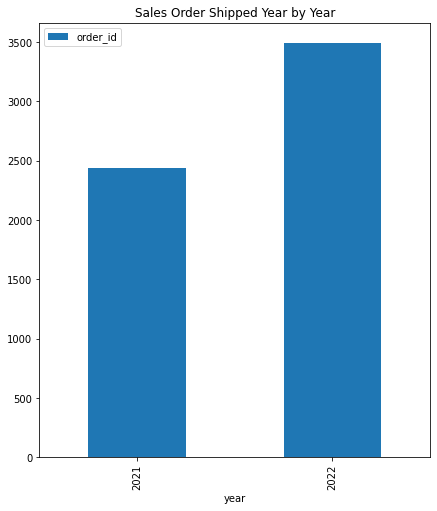

In [52]:
df1[df1["sales_order_status"]=="Shipped"].groupby(["year"]).agg({"order_id":"count"}).plot(kind='bar',figsize=(7,8))
plt.title("Sales Order Shipped Year by Year")
plt.show()

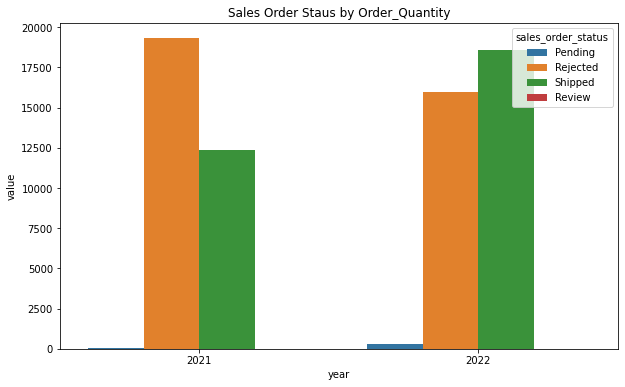

In [55]:
cross_data=pd.crosstab(columns=df['sales_order_status'],
            index=df['year'],
            values=df['ordered_quantity'],
            aggfunc='sum')
stacked = cross_data.stack().reset_index().rename(columns={0:'value'})

plt.figure(figsize=(10,6))
sns.barplot(x=stacked.year, y=stacked.value,hue=stacked.sales_order_status)
plt.title("Sales Order Staus by Order_Quantity")
plt.show()

* over here we see Rejected amount is increases as well as Shipped amount.

In [88]:
cross_data=pd.crosstab(columns=df['fk_product_id'],
            index=df['year'],
            values=df['ordered_quantity'],
            aggfunc='sum')
stacked = cross_data.stack().reset_index().rename(columns={0:'value'})

plt.figure(figsize=(10,6))
sns.barplot(x=stacked.year, y=stacked.value,hue=stacked.order_quantity_accepted	)
plt.title("Sales Order Staus by Order_Quantity")
plt.show()

AttributeError: 'DataFrame' object has no attribute 'order_quantity_accepted'

<Figure size 720x432 with 0 Axes>

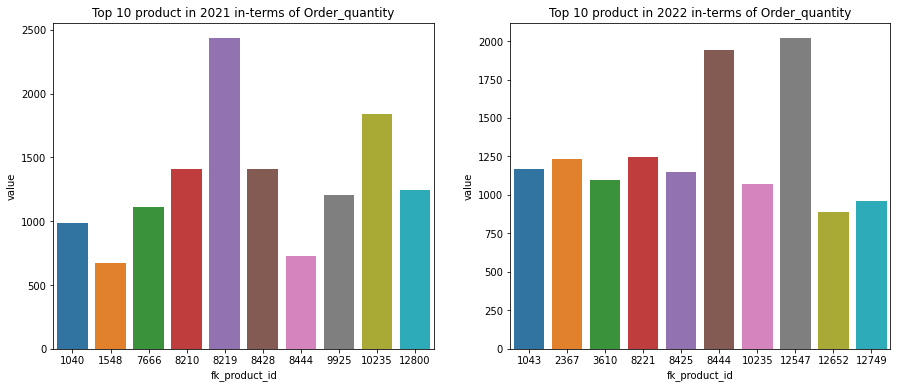

In [62]:
cross_data=pd.crosstab(columns=df['fk_product_id'],
            index=df['year'],
            values=df['ordered_quantity'],
            aggfunc='sum')
stacked = cross_data.stack().reset_index().rename(columns={0:'value'})

plt.figure(figsize=(15,6))
#plot 1:
product_2021 = stacked[stacked["year"]==2021].sort_values("value",ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x=product_2021.fk_product_id,y=product_2021.value)
plt.title("Top 10 product in 2021 in-terms of Order_quantity")

#plot 2:
product_2022 = stacked[stacked["year"]==2022].sort_values("value",ascending=False)[:10]
plt.subplot(1, 2, 2)
sns.barplot(x=product_2022.fk_product_id,y=product_2022.value)
plt.title("Top 10 product in 2022 in-terms of Order_quantity")

plt.show()

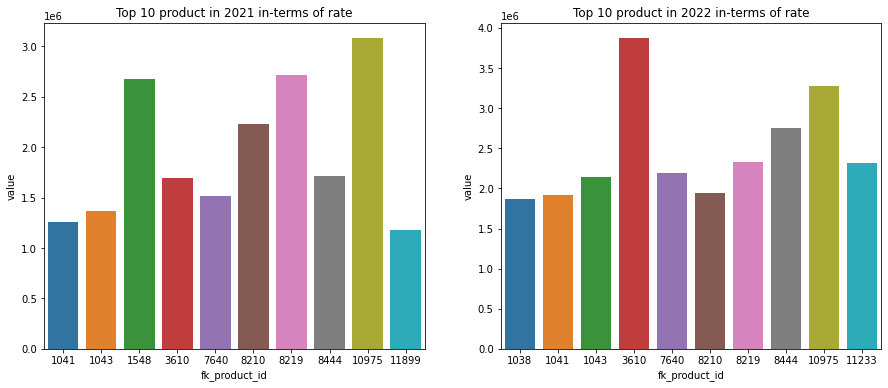

In [63]:
cross_data=pd.crosstab(columns=df['fk_product_id'],
            index=df['year'],
            values=df['rate'],
            aggfunc='sum')
stacked = cross_data.stack().reset_index().rename(columns={0:'value'})

plt.figure(figsize=(15,6))
#plot 1:
product_2021 = stacked[stacked["year"]==2021].sort_values("value",ascending=False)[:10]
plt.subplot(1, 2, 1)
sns.barplot(x=product_2021.fk_product_id,y=product_2021.value)
plt.title("Top 10 product in 2021 in-terms of rate")

#plot 2:
product_2022 = stacked[stacked["year"]==2022].sort_values("value",ascending=False)[:10]
plt.subplot(1, 2, 2)
sns.barplot(x=product_2022.fk_product_id,y=product_2022.value)
plt.title("Top 10 product in 2022 in-terms of rate")

plt.show()

In [65]:
data_2021=df[df["year"]==2021]

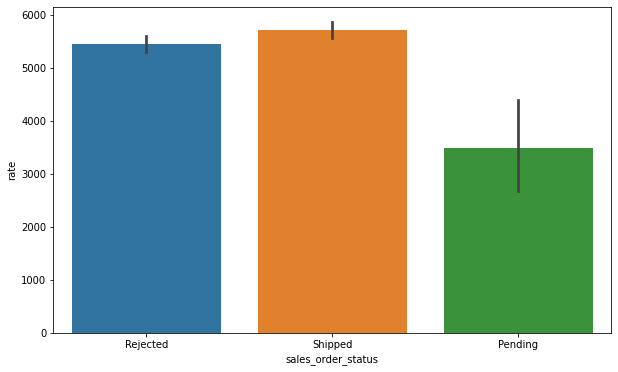

In [66]:
plt.figure(figsize=(10,6))
sns.barplot(x=data_2021.sales_order_status,y=data_2021.rate)
plt.show()

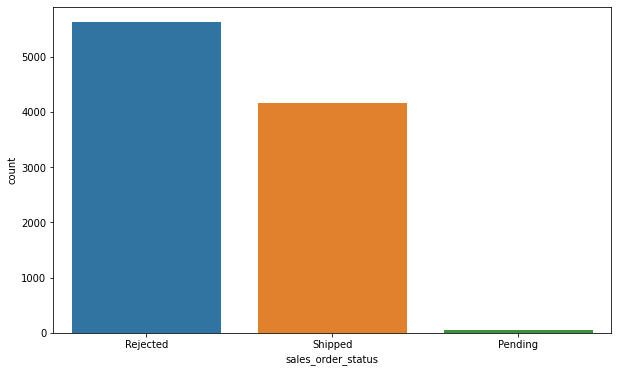

In [68]:
plt.figure(figsize=(10,6))
sns.countplot(df[df["year"]==2021]["sales_order_status"])
plt.show()

sns.countplot(df3["year"])
plt.show()

# *It's look like the user increase in 2022